In [1]:
import argparse
import os
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import datetime as dt
from numpy.random import randint
from matplotlib import pyplot as plt
%matplotlib inline
#import math

In [34]:
path = '/Users/binqi/OneDrive/Documents/CUNY/CCNY Classes/Fall 2022/CSc I4490 Adversarial AI/Project-Option2/Step_3/data/'
fileName ='Day4_Trades_SPY.csv'
Day4 = pd.read_csv(path + fileName, delimiter=',')

In [35]:
Day4.head(10)

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.002130,236.28,100,Z,09:30:00.000093
1,09:30:00.002130,236.29,100,K,09:30:00.000101
2,09:30:00.002130,236.11,1,K,09:30:00.001527
3,09:30:00.002141,236.17,20,K,09:30:00.001640
4,09:30:00.002180,236.03,10,K,09:30:00.001714
5,09:30:00.002218,236.46,8,K,09:30:00.001797
6,09:30:00.002328,236.05,25,K,09:30:00.001927
7,09:30:00.002657,236.04,7,K,09:30:00.002229
8,09:30:00.002828,236.48,100,Z,09:30:00.002380
9,09:30:00.002852,236.30,100,K,09:30:00.002382


In [36]:
Day4.describe()

,PRICE,SIZE
count,2.803902e+06,2.803902e+06
mean,2.368660e+02,9.693719e+01
std,4.192842e+00,1.385586e+03
min,2.278100e+02,1.000000e+00
25%,2.332400e+02,1.400000e+01
50%,2.374100e+02,8.500000e+01
75%,2.400500e+02,1.000000e+02
max,2.484900e+02,2.094942e+06


In [37]:
def computeMinute(s):
    d = pd.to_datetime(s)
    h = d.hour 
    m = d.minute
    return 60*h + m

def computeSecond(s):
    d = pd.to_datetime(s)
    h = d.hour
    m = d.minute
    sec = d.second
    return 60*(60*h+m)+sec

def addMinutesColumn(data):
    data['Minute'] = data.apply(lambda x: computeMinute(x['Time']),axis=1)
    return data

def addSecondsColumn(data):
    data['Second'] = data.apply(lambda x: computeSecond(x['Time']),axis=1)
    return data

In [38]:
Day4 = addMinutesColumn(Day4)

In [92]:
Day4.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute
0,09:30:00.002130,236.28,100,Z,09:30:00.000093,570
1,09:30:00.002130,236.29,100,K,09:30:00.000101,570
2,09:30:00.002130,236.11,1,K,09:30:00.001527,570
3,09:30:00.002141,236.17,20,K,09:30:00.001640,570
4,09:30:00.002180,236.03,10,K,09:30:00.001714,570


In [40]:
Day4['Minute'].value_counts()

954    26518
956    26422
957    22225
955    21747
953    21346
       ...  
733     2886
806     2871
776     2647
748     2581
960       41
Name: Minute, Length: 377, dtype: int64

In [41]:
Day4.describe()

,PRICE,SIZE,Minute
count,2.803902e+06,2.803902e+06,2.803902e+06
mean,2.368660e+02,9.693719e+01,7.761200e+02
std,4.192842e+00,1.385586e+03,1.252394e+02
min,2.278100e+02,1.000000e+00,5.700000e+02
25%,2.332400e+02,1.400000e+01,6.640000e+02
50%,2.374100e+02,8.500000e+01,7.940000e+02
75%,2.400500e+02,1.000000e+02,8.940000e+02
max,2.484900e+02,2.094942e+06,9.600000e+02


In [42]:
Day4.groupby(['Minute'])['PRICE'].first()

Minute
570    236.28
571    238.10
572    239.93
573    239.58
574    241.67
        ...  
956    240.35
957    239.75
958    237.19
959    238.07
960    240.86
Name: PRICE, Length: 377, dtype: float64

In [43]:
Day4.groupby(['Minute'])['PRICE'].last()

Minute
570    238.05
571    239.79
572    239.93
573    241.70
574    240.56
        ...  
956    239.92
957    237.03
958    237.95
959    240.82
960    241.20
Name: PRICE, Length: 377, dtype: float64

In [44]:
#lets compute a few stats per minute and fill in the gaps for missing minutes. For example:
Day4.groupby(['Minute'])['SIZE'].sum()

Minute
570    2415972
571    1620751
572    1477235
573    1387699
574    1051070
        ...   
956    3291039
957    3435449
958    3165541
959    4353150
960    2107160
Name: SIZE, Length: 377, dtype: int64

In [45]:
#now let's do a few of these and join them together by minute:
Volume_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['SIZE'].sum()).rename({'SIZE':'VOLUME'},axis=1)
Num_trades_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].count()).rename({'PRICE':'NUM_TRADES'},axis=1)

max_price_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].max()).rename({'PRICE':'MAX_PRICE'},axis=1)
min_price_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].min()).rename({'PRICE':'MIN_PRICE'},axis=1)
mean_price_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].mean()).rename({'PRICE':'MEAN_PRICE'},axis=1)
first_price_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].first()).rename({'PRICE':'FIRST_PRICE'},axis=1)
last_price_by_minute=pd.DataFrame(Day4.groupby(['Minute'])['PRICE'].last()).rename({'PRICE':'LAST_PRICE'},axis=1)

M = Volume_by_minute.join(Num_trades_by_minute)
M= M.join(max_price_by_minute)
M = M.join(min_price_by_minute)
M = M.join(first_price_by_minute)
M =M.join(last_price_by_minute)
M = M.join(mean_price_by_minute)


In [46]:
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE
Minute,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947
...,...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,240.35,239.92,240.057931
957,3435449,22225,240.18,236.32,239.75,237.03,238.135472
958,3165541,19772,238.34,236.25,237.19,237.95,237.127489


In [47]:
# fill in the missing minutes
M = M.reindex(list(range(M.index.min(),M.index.max()+1)),fill_value=0)

In [48]:
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE
Minute,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947
...,...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,240.35,239.92,240.057931
957,3435449,22225,240.18,236.32,239.75,237.03,238.135472
958,3165541,19772,238.34,236.25,237.19,237.95,237.127489


In [49]:
M[M['VOLUME']==0]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE
Minute,,,,,,,
777,0,0,0.0,0.0,0.0,0.0,0.0
778,0,0,0.0,0.0,0.0,0.0,0.0
779,0,0,0.0,0.0,0.0,0.0,0.0
780,0,0,0.0,0.0,0.0,0.0,0.0
781,0,0,0.0,0.0,0.0,0.0,0.0
782,0,0,0.0,0.0,0.0,0.0,0.0
783,0,0,0.0,0.0,0.0,0.0,0.0
784,0,0,0.0,0.0,0.0,0.0,0.0
785,0,0,0.0,0.0,0.0,0.0,0.0


In [50]:
len(M[M['VOLUME']==0])

14

In [57]:
# calculate price gap between max price and min price per minute
M['Price_Gap'] = M.apply(lambda x: abs(x['MAX_PRICE']-x['MIN_PRICE']), axis=1)

In [58]:
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift
Minute,,,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030,3.22,NaN
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419,4.65,237.652030
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180,1.85,239.453419
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011,4.10,239.495180
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947,2.37,241.525011
...,...,...,...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,240.35,239.92,240.057931,1.58,239.833142
957,3435449,22225,240.18,236.32,239.75,237.03,238.135472,3.86,240.057931
958,3165541,19772,238.34,236.25,237.19,237.95,237.127489,2.09,238.135472


In [59]:
def computeLogChange(numerator, denominator):
    if denominator == 0 or numerator == 0:
        res =0
    else :
         res = np.log(numerator / denominator)
    return res 

In [60]:
M['MEAN_shift'] = M['MEAN_PRICE'].shift()

In [61]:
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift
Minute,,,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030,3.22,NaN
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419,4.65,237.652030
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180,1.85,239.453419
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011,4.10,239.495180
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947,2.37,241.525011
...,...,...,...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,240.35,239.92,240.057931,1.58,239.833142
957,3435449,22225,240.18,236.32,239.75,237.03,238.135472,3.86,240.057931
958,3165541,19772,238.34,236.25,237.19,237.95,237.127489,2.09,238.135472


In [62]:
M['CHANGE'] = M.apply(lambda x: computeLogChange(x['MEAN_PRICE'], x['MEAN_shift']), axis =1)
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE
Minute,,,,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030,3.22,NaN,NaN
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419,4.65,237.652030,0.007551
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180,1.85,239.453419,0.000174
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011,4.10,239.495180,0.008440
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947,2.37,241.525011,-0.001865
...,...,...,...,...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,240.35,239.92,240.057931,1.58,239.833142,0.000937
957,3435449,22225,240.18,236.32,239.75,237.03,238.135472,3.86,240.057931,-0.008041
958,3165541,19772,238.34,236.25,237.19,237.95,237.127489,2.09,238.135472,-0.004242


Text(0, 0.5, 'Mean Price Change Per Minute ')

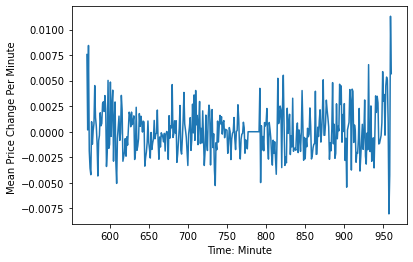

In [63]:
#plot the Change column
plt.plot(M.CHANGE)
plt.xlabel("Time: Minute")
plt.ylabel("Mean Price Change Per Minute ")

Text(0.5, 1.0, 'Violatility In Price for Day 4')

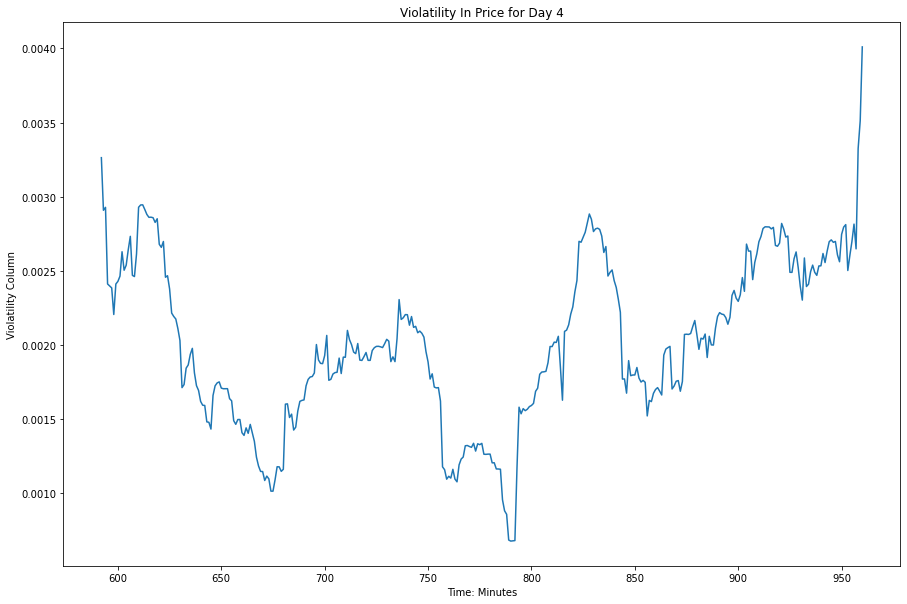

In [64]:
# compute rolling violatility in 1-day, offset using .shift() method
# instead of 21 days, use 21 minutes 
plt.figure(figsize=(15,10))
M['Volatility'] = M.CHANGE.rolling(21).std().shift()
M['Volatility'].plot()
plt.xlabel("Time: Minutes")
plt.ylabel('Violatility Column')
plt.title("Violatility In Price for Day 4")

In [65]:
#offset expected change 1-transaction  (1sd * price)
M['Expected_Change'] = M['Volatility'] * M['MEAN_PRICE'].shift()
M['Actual_Change'] = M['MEAN_PRICE'] - M['MEAN_PRICE'].shift()
M.head(-20)

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE,Volatility,Expected_Change,Actual_Change
Minute,,,,,,,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030,3.22,NaN,NaN,NaN,NaN,NaN
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419,4.65,237.652030,0.007551,NaN,NaN,1.801388
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180,1.85,239.453419,0.000174,NaN,NaN,0.041762
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011,4.10,239.495180,0.008440,NaN,NaN,2.029831
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947,2.37,241.525011,-0.001865,NaN,NaN,-0.450064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,420779,5165,232.87,231.88,232.58,232.32,232.330585,0.99,232.640446,-0.001333,0.002539,0.590652,-0.309861
937,588982,6142,232.93,231.45,232.35,231.77,232.191773,1.48,232.330585,-0.000598,0.002490,0.578577,-0.138812
938,1169959,9240,232.30,230.77,231.76,230.92,231.370729,1.53,232.191773,-0.003542,0.002470,0.573506,-0.821044


In [66]:
#data from minutes right before the halt:
M.loc[770:780]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE,Volatility,Expected_Change,Actual_Change
Minute,,,,,,,,,,,,,
770,396680,4482,237.37,236.30,237.07,236.99,236.870721,1.07,236.908366,-0.000159,0.001316,0.311866,-0.037645
771,525682,5919,237.82,236.38,236.94,237.25,237.090693,1.44,236.870721,0.000928,0.001311,0.310489,0.219972
772,307282,3106,237.72,236.61,237.33,236.87,237.183232,1.11,237.090693,0.000390,0.001338,0.317250,0.092540
773,546373,4792,237.13,236.35,236.94,236.71,236.685083,0.78,237.183232,-0.002102,0.001286,0.304921,-0.498149
774,759232,7603,236.92,236.04,236.66,236.64,236.495998,0.88,236.685083,-0.000799,0.001335,0.315918,-0.189086
775,811702,8075,237.07,235.55,236.55,235.99,236.220100,1.52,236.495998,-0.001167,0.001329,0.314261,-0.275897
776,322763,2647,236.20,235.45,235.96,235.65,235.824439,0.75,236.220100,-0.001676,0.001338,0.315971,-0.395661
777,0,0,0.00,0.00,0.00,0.00,0.000000,0.00,235.824439,0.000000,0.001264,0.298176,-235.824439
778,0,0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.001264,0.000000,0.000000


In [67]:
#def rollingMeanPrice(data):
# rolling window average stock price per 5 minutes, based on mean stock price per minute column
M['MA_5'] = M['MEAN_PRICE'].rolling(window=5).mean().shift()

In [68]:
M.head()

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE,Volatility,Expected_Change,Actual_Change,MA_5
Minute,,,,,,,,,,,,,,
570,2415972,12993,239.23,236.01,236.28,238.05,237.652030,3.22,NaN,NaN,NaN,NaN,NaN,NaN
571,1620751,12169,240.68,236.03,238.10,239.79,239.453419,4.65,237.652030,0.007551,NaN,NaN,1.801388,NaN
572,1477235,11760,240.52,238.67,239.93,239.93,239.495180,1.85,239.453419,0.000174,NaN,NaN,0.041762,NaN
573,1387699,11952,243.54,239.44,239.58,241.70,241.525011,4.10,239.495180,0.008440,NaN,NaN,2.029831,NaN
574,1051070,11460,242.36,239.99,241.67,240.56,241.074947,2.37,241.525011,-0.001865,NaN,NaN,-0.450064,NaN


In [69]:
# calculate the Exponential Moving Average price every 5 minutes.
M['EMA5'] = M['MEAN_PRICE'].ewm(span=5, adjust=False).mean().shift()

In [70]:
M.loc[770:780]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE,Volatility,Expected_Change,Actual_Change,MA_5,EMA5
Minute,,,,,,,,,,,,,,,
770,396680,4482,237.37,236.30,237.07,236.99,236.870721,1.07,236.908366,-0.000159,0.001316,0.311866,-0.037645,237.382378,237.196055
771,525682,5919,237.82,236.38,236.94,237.25,237.090693,1.44,236.870721,0.000928,0.001311,0.310489,0.219972,237.132960,237.087610
772,307282,3106,237.72,236.61,237.33,236.87,237.183232,1.11,237.090693,0.000390,0.001338,0.317250,0.092540,236.995737,237.088638
773,546373,4792,237.13,236.35,236.94,236.71,236.685083,0.78,237.183232,-0.002102,0.001286,0.304921,-0.498149,237.003696,237.120169
774,759232,7603,236.92,236.04,236.66,236.64,236.495998,0.88,236.685083,-0.000799,0.001335,0.315918,-0.189086,236.947619,236.975141
775,811702,8075,237.07,235.55,236.55,235.99,236.220100,1.52,236.495998,-0.001167,0.001329,0.314261,-0.275897,236.865145,236.815426
776,322763,2647,236.20,235.45,235.96,235.65,235.824439,0.75,236.220100,-0.001676,0.001338,0.315971,-0.395661,236.735021,236.616984
777,0,0,0.00,0.00,0.00,0.00,0.000000,0.00,235.824439,0.000000,0.001264,0.298176,-235.824439,236.481771,236.352803
778,0,0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.001264,0.000000,0.000000,189.045124,157.568535


In [71]:
def volumePerTrade (numerator, denominator):
    if denominator == 0 :
        res = 0
    else :
        res = numerator / denominator
    return res    

In [72]:
M['Volume_Per_Trade'] = M.apply( lambda x: volumePerTrade(x['VOLUME'], x['NUM_TRADES']), axis=1)

In [73]:
M.loc[765:780]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,FIRST_PRICE,LAST_PRICE,MEAN_PRICE,Price_Gap,MEAN_shift,CHANGE,Volatility,Expected_Change,Actual_Change,MA_5,EMA5,Volume_Per_Trade
Minute,,,,,,,,,,,,,,,,
765,513149,5674,238.76,237.32,238.38,238.06,238.117811,1.44,237.814243,0.001276,0.001193,0.283621,0.303568,237.376434,237.476136,90.438668
766,408274,4287,238.52,237.02,237.92,237.36,237.776811,1.50,238.117811,-0.001433,0.001232,0.293305,-0.341000,237.486604,237.690027,95.235363
767,476818,4116,237.56,236.65,237.10,237.04,237.143435,0.91,237.776811,-0.002667,0.001246,0.296184,-0.633376,237.611533,237.718955,115.844995
768,643334,6907,237.73,236.27,237.41,236.89,236.965468,1.46,237.143435,-0.000751,0.001321,0.313346,-0.177967,237.608029,237.527115,93.142319
769,470835,4473,237.45,236.37,236.75,236.66,236.908366,1.08,236.965468,-0.000241,0.001323,0.313561,-0.057103,237.563554,237.339900,105.261569
770,396680,4482,237.37,236.30,237.07,236.99,236.870721,1.07,236.908366,-0.000159,0.001316,0.311866,-0.037645,237.382378,237.196055,88.505132
771,525682,5919,237.82,236.38,236.94,237.25,237.090693,1.44,236.870721,0.000928,0.001311,0.310489,0.219972,237.132960,237.087610,88.812637
772,307282,3106,237.72,236.61,237.33,236.87,237.183232,1.11,237.090693,0.000390,0.001338,0.317250,0.092540,236.995737,237.088638,98.931745
773,546373,4792,237.13,236.35,236.94,236.71,236.685083,0.78,237.183232,-0.002102,0.001286,0.304921,-0.498149,237.003696,237.120169,114.017738


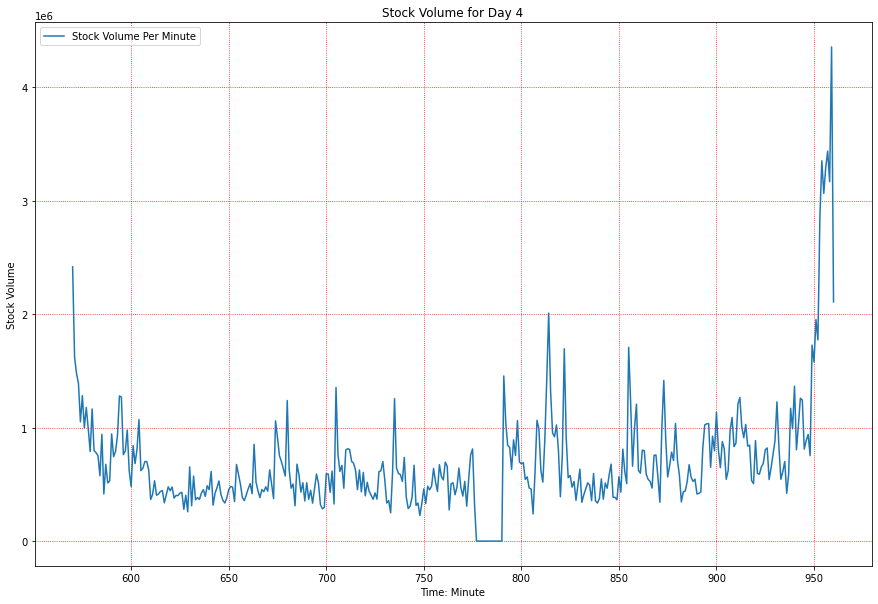

In [74]:
plt.figure(figsize=(15,10))
y= M['VOLUME']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='Stock Volume Per Minute')
plt.title("Stock Volume for Day 4")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Volume')
plt.legend(loc=2)
plt.show()

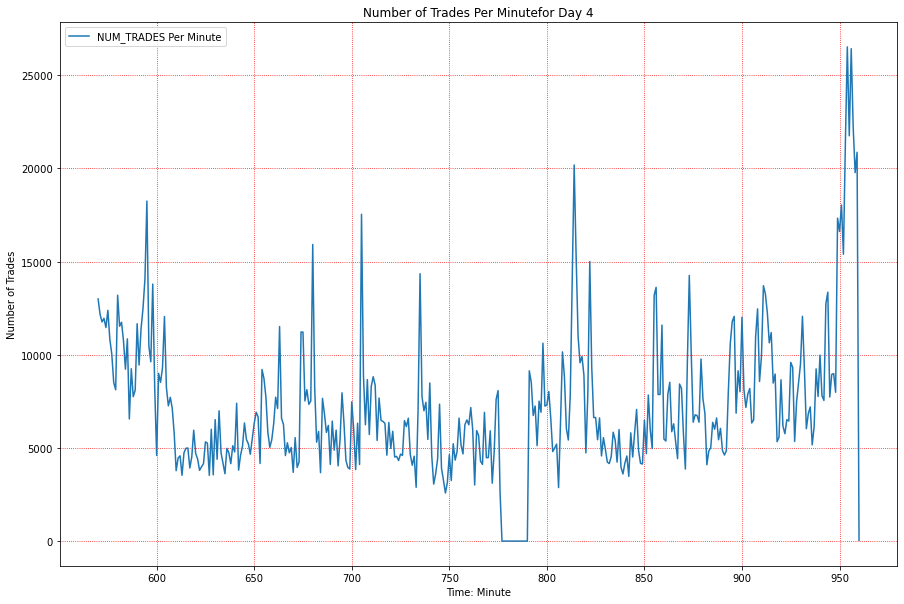

In [75]:
plt.figure(figsize=(15,10))
y= M['NUM_TRADES']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='NUM_TRADES Per Minute')
plt.title("Number of Trades Per Minutefor Day 4")
plt.xlabel("Time: Minute")
plt.ylabel('Number of Trades')
plt.legend(loc=2)
plt.show()

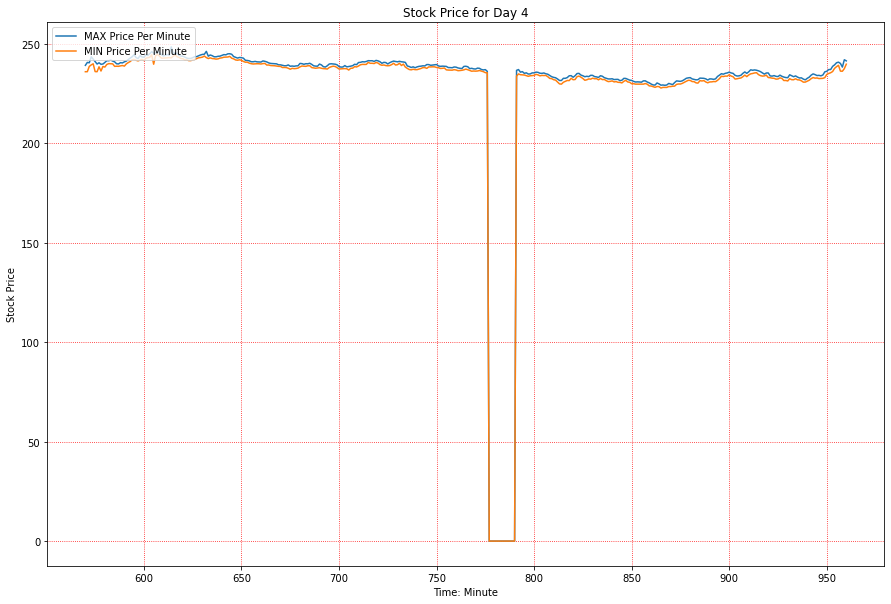

In [76]:
plt.figure(figsize=(15,10))
y= M['MAX_PRICE']
z= M['MIN_PRICE']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='MAX Price Per Minute')
plt.plot(z, label='MIN Price Per Minute')
plt.title("Stock Price for Day 4")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Price')
plt.legend(loc=2)
plt.show()

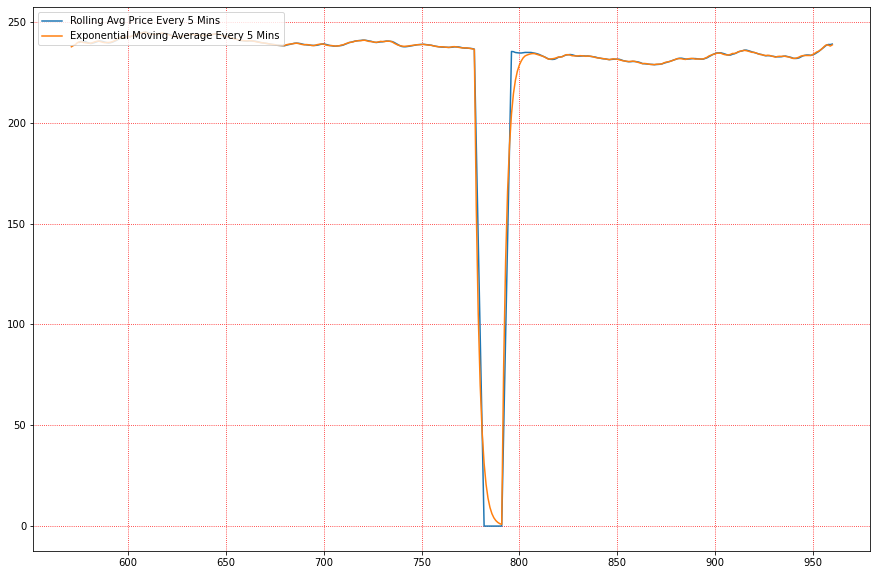

In [77]:
plt.figure(figsize=(15,10))
y= M['MA_5']
z= M['EMA5']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='Rolling Avg Price Every 5 Mins')
plt.plot(z, label='Exponential Moving Average Every 5 Mins')
plt.legend(loc=2)
plt.show()

In [78]:
M = M.copy()
M = M[['VOLUME', 'NUM_TRADES', 'MAX_PRICE', 'MIN_PRICE', 'Price_Gap', 'MEAN_PRICE']]

In [79]:
M

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,Price_Gap,MEAN_PRICE
Minute,,,,,,
570,2415972,12993,239.23,236.01,3.22,237.652030
571,1620751,12169,240.68,236.03,4.65,239.453419
572,1477235,11760,240.52,238.67,1.85,239.495180
573,1387699,11952,243.54,239.44,4.10,241.525011
574,1051070,11460,242.36,239.99,2.37,241.074947
...,...,...,...,...,...,...
956,3291039,26422,240.81,239.23,1.58,240.057931
957,3435449,22225,240.18,236.32,3.86,238.135472
958,3165541,19772,238.34,236.25,2.09,237.127489


In [80]:
#proposed model: if price gap > $1.50 and number of trades > 8000 in a single minute, 
#guess that a circuit breaker is coming. 

In [81]:
def modelTrigger(num_trades,price_gap):
    if(price_gap > 1.5):
        if(num_trades > 8000):
            return 1
    return 0

In [82]:
M['Trigger'] = M.apply(lambda x: modelTrigger(x['NUM_TRADES'],x['Price_Gap']),axis=1)

In [83]:
M[M['Trigger']==1]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,Price_Gap,MEAN_PRICE,Trigger
Minute,,,,,,,
570,2415972,12993,239.23,236.01,3.22,237.652030,1
571,1620751,12169,240.68,236.03,4.65,239.453419,1
572,1477235,11760,240.52,238.67,1.85,239.495180,1
573,1387699,11952,243.54,239.44,4.10,241.525011,1
574,1051070,11460,242.36,239.99,2.37,241.074947,1
...,...,...,...,...,...,...,...
955,3062583,21747,240.52,238.55,1.97,239.833142,1
956,3291039,26422,240.81,239.23,1.58,240.057931,1
957,3435449,22225,240.18,236.32,3.86,238.135472,1


In [84]:
len(M[M['Trigger']==1])

76

In [85]:
M.loc[775]

VOLUME        811702.0000
NUM_TRADES      8075.0000
MAX_PRICE        237.0700
MIN_PRICE        235.5500
Price_Gap          1.5200
MEAN_PRICE       236.2201
Trigger            1.0000
Name: 775, dtype: float64

In [86]:
M.loc[760:780]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,Price_Gap,MEAN_PRICE,Trigger
Minute,,,,,,,
760,538704,6239,238.31,236.88,1.43,237.566959,0
761,695713,7168,237.91,236.54,1.37,237.152167,0
762,658357,5970,237.72,236.61,1.11,237.160958,0
763,274989,3010,237.61,236.74,0.87,237.187844,0
764,504686,5930,238.68,236.96,1.72,237.814243,0
765,513149,5674,238.76,237.32,1.44,238.117811,0
766,408274,4287,238.52,237.02,1.50,237.776811,0
767,476818,4116,237.56,236.65,0.91,237.143435,0
768,643334,6907,237.73,236.27,1.46,236.965468,0


In [87]:
# test the trigger on March 6. 2020's stock data 
path = '/Users/binqi/OneDrive/Documents/CUNY/CCNY Classes/Fall 2022/CSc I4490 Adversarial AI/Project-Option2/Step 5/'
fileName ='March6_2020_Trades_SPY_corrected.csv'
marchSix = pd.read_csv(path + fileName, delimiter=',')

In [88]:
marchSix.head(10)

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.024208,293.01,100,Z,09:30:00.023804
1,09:30:00.033932,292.89,100,Z,09:30:00.033474
2,09:30:00.051190,293.22,100,Z,09:30:00.050768
3,09:30:00.051198,292.95,100,Z,09:30:00.050768
4,09:30:00.082625,292.98,74,Y,09:30:00.082199
5,09:30:00.083670,293.31,100,K,09:30:00.083227
6,09:30:00.089749,293.02,100,Z,09:30:00.089284
7,09:30:00.089749,293.23,100,K,09:30:00.089286
8,09:30:00.100065,292.97,11,K,09:30:00.099634
9,09:30:00.107655,293.23,100,N,09:30:00.107531


In [89]:
marchSix.describe()

,PRICE,SIZE
count,1.597261e+06,1.597261e+06
mean,2.943027e+02,1.150888e+02
std,1.812569e+00,2.031130e+03
min,2.899300e+02,1.000000e+00
25%,2.931500e+02,2.000000e+01
50%,2.941800e+02,1.000000e+02
75%,2.955000e+02,1.000000e+02
max,2.990500e+02,2.460186e+06


In [90]:
marchSix = addMinutesColumn(marchSix)

In [93]:
marchSix.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute
0,09:30:00.024208,293.01,100,Z,09:30:00.023804,570
1,09:30:00.033932,292.89,100,Z,09:30:00.033474,570
2,09:30:00.051190,293.22,100,Z,09:30:00.050768,570
3,09:30:00.051198,292.95,100,Z,09:30:00.050768,570
4,09:30:00.082625,292.98,74,Y,09:30:00.082199,570


In [94]:
# is total rows is not 391, there is missing data, trading halted
marchSix['Minute'].value_counts()

931    17257
957    16903
935    14651
959    14335
958    13887
       ...  
818     1130
798     1081
797      956
799      904
960      109
Name: Minute, Length: 391, dtype: int64

In [95]:
marchSix.describe()

,PRICE,SIZE,Minute
count,1.597261e+06,1.597261e+06,1.597261e+06
mean,2.943027e+02,1.150888e+02,7.771759e+02
std,1.812569e+00,2.031130e+03,1.338901e+02
min,2.899300e+02,1.000000e+00,5.700000e+02
25%,2.931500e+02,2.000000e+01,6.430000e+02
50%,2.941800e+02,1.000000e+02,7.790000e+02
75%,2.955000e+02,1.000000e+02,9.150000e+02
max,2.990500e+02,2.460186e+06,9.600000e+02


In [96]:
# since length is 391, there is no missing data, no trading halt
marchSix.groupby(['Minute'])['PRICE'].first()

Minute
570    293.01
571    293.40
572    293.49
573    293.96
574    294.40
        ...  
956    297.27
957    297.80
958    297.90
959    297.88
960    297.29
Name: PRICE, Length: 391, dtype: float64

In [97]:
marchSix.groupby(['Minute'])['SIZE'].sum()

Minute
570    1594303
571    1348177
572    1144265
573     843035
574    1057013
        ...   
956    1612242
957    2949164
958    2473486
959    3117437
960    2551557
Name: SIZE, Length: 391, dtype: int64

In [98]:
# calculate some stats and join them together by minute:
Volume_by_minute_1=pd.DataFrame(marchSix.groupby(['Minute'])['SIZE'].sum()).rename({'SIZE':'VOLUME'},axis=1)
Num_trades_by_minute_1=pd.DataFrame(marchSix.groupby(['Minute'])['PRICE'].count()).rename({'PRICE':'NUM_TRADES'},axis=1)

max_price_by_minute_1=pd.DataFrame(marchSix.groupby(['Minute'])['PRICE'].max()).rename({'PRICE':'MAX_PRICE'},axis=1)
min_price_by_minute_1=pd.DataFrame(marchSix.groupby(['Minute'])['PRICE'].min()).rename({'PRICE':'MIN_PRICE'},axis=1)
mean_price_by_minute_1=pd.DataFrame(marchSix.groupby(['Minute'])['PRICE'].mean()).rename({'PRICE':'MEAN_PRICE'},axis=1)

M_1 = Volume_by_minute_1.join(Num_trades_by_minute_1)
M_1= M_1.join(max_price_by_minute_1)
M_1 = M_1.join(min_price_by_minute_1)
M_1 =M_1.join(mean_price_by_minute_1)

In [99]:
M_1

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE
Minute,,,,,
570,1594303,8087,293.67,292.20,293.085175
571,1348177,9435,293.70,292.52,293.145295
572,1144265,8049,294.44,292.76,293.631898
573,843035,7916,294.75,293.44,294.160249
574,1057013,10244,294.75,292.72,293.686339
...,...,...,...,...,...
956,1612242,8861,297.99,296.80,297.506395
957,2949164,16903,299.05,297.32,298.274130
958,2473486,13887,298.55,297.31,297.945059


In [100]:
M_1['Price_Gap'] = M_1.apply(lambda x: abs(x['MAX_PRICE']-x['MIN_PRICE']), axis=1)

In [101]:
M_1

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE,Price_Gap
Minute,,,,,,
570,1594303,8087,293.67,292.20,293.085175,1.47
571,1348177,9435,293.70,292.52,293.145295,1.18
572,1144265,8049,294.44,292.76,293.631898,1.68
573,843035,7916,294.75,293.44,294.160249,1.31
574,1057013,10244,294.75,292.72,293.686339,2.03
...,...,...,...,...,...,...
956,1612242,8861,297.99,296.80,297.506395,1.19
957,2949164,16903,299.05,297.32,298.274130,1.73
958,2473486,13887,298.55,297.31,297.945059,1.24


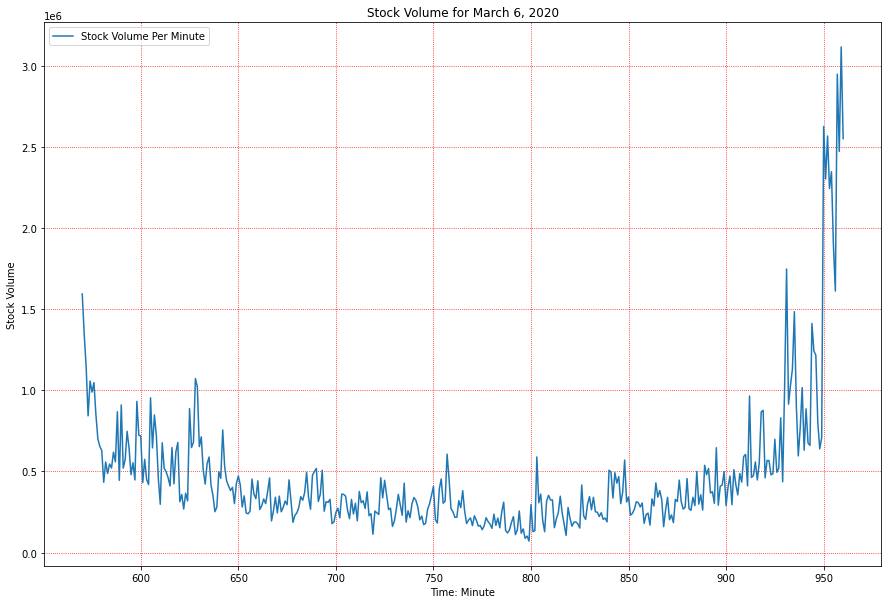

In [102]:
plt.figure(figsize=(15,10))
#x= M['Minute']
y= M_1['VOLUME']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='Stock Volume Per Minute')
plt.title("Stock Volume for March 6, 2020")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Volume')
plt.legend(loc=2)
plt.show()

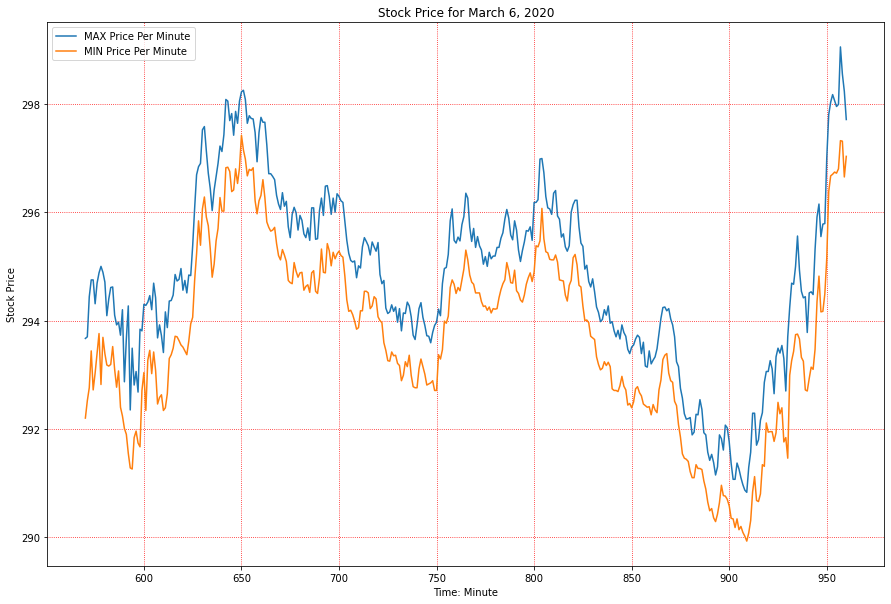

In [103]:
plt.figure(figsize=(15,10))
#x= M['Minute']
y= M_1['MAX_PRICE']
z= M_1['MIN_PRICE']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='MAX Price Per Minute')
plt.plot(z, label='MIN Price Per Minute')
plt.title("Stock Price for March 6, 2020")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Price')
plt.legend(loc=2)
plt.show()

In [104]:
# Test the trigger on stock data from March 6, 2020
M_1['Trigger'] = M_1.apply(lambda x: modelTrigger(x['NUM_TRADES'],x['Price_Gap']),axis=1)

In [105]:
M_1[M_1['Trigger']==1]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE,Price_Gap,Trigger
Minute,,,,,,,
572,1144265,8049,294.44,292.76,293.631898,1.68,1
574,1057013,10244,294.75,292.72,293.686339,2.03,1
918,866992,8634,292.86,291.31,292.089868,1.55,1
930,1026253,11523,293.70,291.46,292.628907,2.24,1
935,1485309,14651,295.56,293.75,294.828847,1.81,1
939,1017487,8673,294.44,292.72,293.374283,1.72,1
944,1412433,11576,295.31,293.47,294.461010,1.84,1
945,1243293,13304,295.91,294.35,295.162176,1.56,1
950,2626748,13551,297.00,295.15,296.153502,1.85,1


In [106]:
# number of minutes triggered from March 6, 2020's data
len(M_1[M_1['Trigger']==1])

11

In [107]:
# Test the trigger on March 9, 2020's data
path = '/Users/binqi/OneDrive/Documents/CUNY/CCNY Classes/Fall 2022/CSc I4490 Adversarial AI/Project-Option2/Step 5/'
fileName ='March9_2020_Trades_SPY_corrected.csv'
marchNine = pd.read_csv(path + fileName, delimiter=',')

In [108]:
marchNine.head(10)

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.023733,275.15,100,C,09:30:00.023584
1,09:30:00.026909,275.55,100,X,09:30:00.026331
2,09:30:00.027220,275.51,100,Z,09:30:00.026787
3,09:30:00.027242,275.43,100,N,09:30:00.027119
4,09:30:00.031943,275.06,100,K,09:30:00.031519
5,09:30:00.033035,275.48,100,J,09:30:00.032589
6,09:30:00.033154,275.49,100,Y,09:30:00.032707
7,09:30:00.077047,275.56,100,B,09:30:00.076539
8,09:30:00.091219,275.55,100,Z,09:30:00.090785
9,09:30:00.109519,275.38,9,K,09:30:00.109120


In [109]:
marchNine.describe()

,PRICE,SIZE
count,2.478238e+06,2.478238e+06
mean,2.787329e+02,9.735050e+01
std,2.496753e+00,2.390868e+03
min,2.731900e+02,1.000000e+00
25%,2.767000e+02,1.200000e+01
50%,2.787100e+02,9.700000e+01
75%,2.807900e+02,1.000000e+02
max,2.844500e+02,3.482416e+06


In [110]:
marchNine = addMinutesColumn(marchNine)

In [111]:
marchNine.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute
0,09:30:00.023733,275.15,100,C,09:30:00.023584,570
1,09:30:00.026909,275.55,100,X,09:30:00.026331,570
2,09:30:00.027220,275.51,100,Z,09:30:00.026787,570
3,09:30:00.027242,275.43,100,N,09:30:00.027119,570
4,09:30:00.031943,275.06,100,K,09:30:00.031519,570


In [112]:
# if length is not 391, then there is data missing, trading halted
marchNine['Minute'].value_counts()

959    24680
950    23987
958    16601
590    16516
949    15987
       ...  
807     2137
804     2023
799     2000
574     1644
960       94
Name: Minute, Length: 377, dtype: int64

In [113]:
marchNine.describe()

,PRICE,SIZE,Minute
count,2.478238e+06,2.478238e+06,2.478238e+06
mean,2.787329e+02,9.735050e+01,7.718945e+02
std,2.496753e+00,2.390868e+03,1.251288e+02
min,2.731900e+02,1.000000e+00,5.700000e+02
25%,2.767000e+02,1.200000e+01,6.510000e+02
50%,2.787100e+02,9.700000e+01,7.670000e+02
75%,2.807900e+02,1.000000e+02,8.920000e+02
max,2.844500e+02,3.482416e+06,9.600000e+02


In [114]:
marchNine.groupby(['Minute'])['PRICE'].first()

Minute
570    275.15
571    276.06
572    275.77
573    276.70
574    276.27
        ...  
956    277.59
957    276.48
958    275.87
959    275.41
960    274.66
Name: PRICE, Length: 377, dtype: float64

In [115]:
marchNine.groupby(['Minute'])['PRICE'].sum()

Minute
570    3334223.24
571    2642817.53
572    3435497.73
573    2364201.44
574     454384.61
          ...    
956    3142917.22
957    4403163.70
958    4577048.19
959    6791733.38
960      25785.11
Name: PRICE, Length: 377, dtype: float64

In [127]:
# calculate some stats and join them together by minute:
Volume_by_minute_2=pd.DataFrame(marchNine.groupby(['Minute'])['SIZE'].sum()).rename({'SIZE':'VOLUME'},axis=1)
Num_trades_by_minute_2=pd.DataFrame(marchNine.groupby(['Minute'])['PRICE'].count()).rename({'PRICE':'NUM_TRADES'},axis=1)

max_price_by_minute_2=pd.DataFrame(marchNine.groupby(['Minute'])['PRICE'].max()).rename({'PRICE':'MAX_PRICE'},axis=1)
min_price_by_minute_2=pd.DataFrame(marchNine.groupby(['Minute'])['PRICE'].min()).rename({'PRICE':'MIN_PRICE'},axis=1)
mean_price_by_minute_2=pd.DataFrame(marchNine.groupby(['Minute'])['PRICE'].mean()).rename({'PRICE':'MEAN_PRICE'},axis=1)

M_2 = Volume_by_minute_2.join(Num_trades_by_minute_2)
M_2= M_2.join(max_price_by_minute_2)
M_2 = M_2.join(min_price_by_minute_2)
M_2 =M_2.join(mean_price_by_minute_2)

In [128]:
M_2

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE
Minute,,,,,
570,2420467,12096,276.47,274.80,275.646763
571,870017,9577,276.55,275.19,275.954634
572,1283640,12423,277.22,275.27,276.543325
573,969580,8552,277.12,276.01,276.450122
574,171593,1644,276.78,276.04,276.389665
...,...,...,...,...,...
956,1720313,11352,277.66,276.17,276.860220
957,2176234,15948,276.84,275.42,276.095040
958,2430829,16601,276.43,275.05,275.709186


In [129]:
#fill in the missing minutes
M_2 = M_2.reindex(list(range(M_2.index.min(),M_2.index.max()+1)),fill_value=0)

In [130]:
M_2[M_2['VOLUME']==0]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE
Minute,,,,,
575,0,0,0.0,0.0,0.0
576,0,0,0.0,0.0,0.0
577,0,0,0.0,0.0,0.0
578,0,0,0.0,0.0,0.0
579,0,0,0.0,0.0,0.0
580,0,0,0.0,0.0,0.0
581,0,0,0.0,0.0,0.0
582,0,0,0.0,0.0,0.0
583,0,0,0.0,0.0,0.0


In [131]:
M_2['Price_Gap'] = M_2.apply(lambda x: abs(x['MAX_PRICE']-x['MIN_PRICE']), axis=1)

In [132]:
M_2.loc[570:590]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE,Price_Gap
Minute,,,,,,
570,2420467,12096,276.47,274.80,275.646763,1.67
571,870017,9577,276.55,275.19,275.954634,1.36
572,1283640,12423,277.22,275.27,276.543325,1.95
573,969580,8552,277.12,276.01,276.450122,1.11
574,171593,1644,276.78,276.04,276.389665,0.74
575,0,0,0.00,0.00,0.000000,0.00
576,0,0,0.00,0.00,0.000000,0.00
577,0,0,0.00,0.00,0.000000,0.00
578,0,0,0.00,0.00,0.000000,0.00


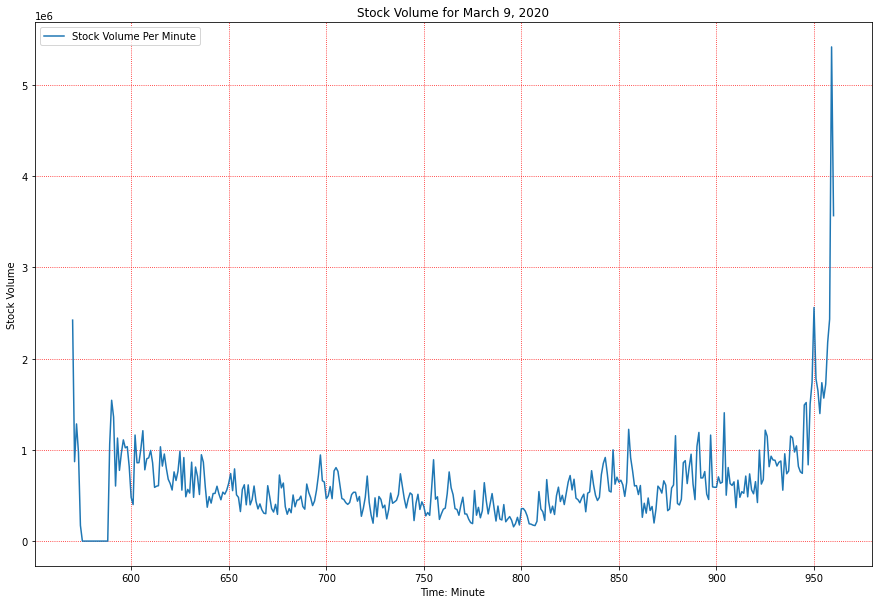

In [133]:
plt.figure(figsize=(15,10))
y= M_2['VOLUME']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='Stock Volume Per Minute')
plt.title("Stock Volume for March 9, 2020")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Volume')
plt.legend(loc=2)
plt.show()

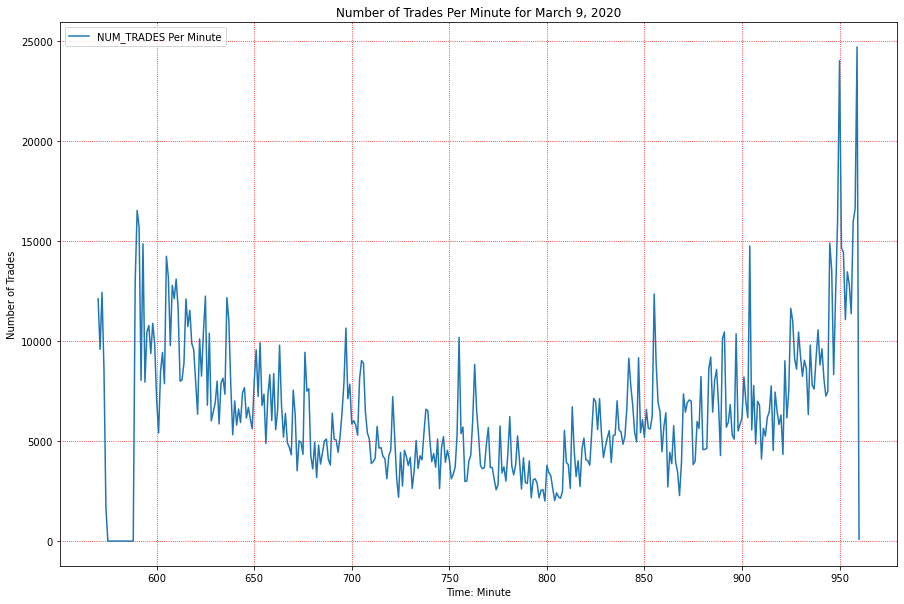

In [134]:
plt.figure(figsize=(15,10))
y= M_2['NUM_TRADES']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='NUM_TRADES Per Minute')
plt.title("Number of Trades Per Minute for March 9, 2020")
plt.xlabel("Time: Minute")
plt.ylabel('Number of Trades')
plt.legend(loc=2)
plt.show()

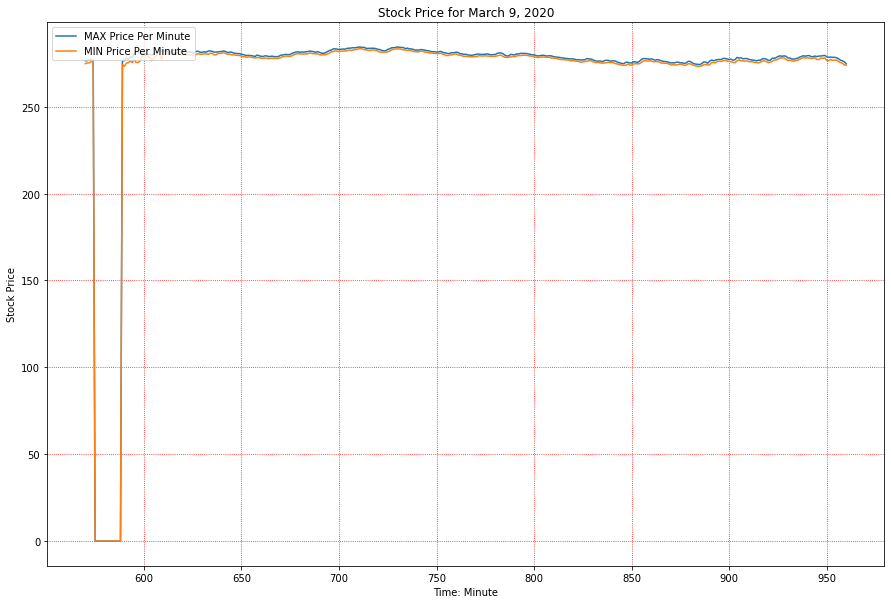

In [135]:
plt.figure(figsize=(15,10))
y= M_2['MAX_PRICE']
z= M_2['MIN_PRICE']
plt.grid(True, color='r', linestyle=':')
plt.plot(y, label='MAX Price Per Minute')
plt.plot(z, label='MIN Price Per Minute')
plt.title("Stock Price for March 9, 2020")
plt.xlabel("Time: Minute")
plt.ylabel('Stock Price')
plt.legend(loc=2)
plt.show()

In [136]:
M_2['Trigger'] = M_2.apply(lambda x: modelTrigger(x['NUM_TRADES'],x['Price_Gap']),axis=1)

In [137]:
M_2[M_2['Trigger']==1]

,VOLUME,NUM_TRADES,MAX_PRICE,MIN_PRICE,MEAN_PRICE,Price_Gap,Trigger
Minute,,,,,,,
570,2420467,12096,276.47,274.80,275.646763,1.67,1
572,1283640,12423,277.22,275.27,276.543325,1.95,1
589,1062718,12967,276.55,274.21,275.462926,2.34,1
590,1542630,16516,276.53,273.24,274.573619,3.29,1
591,1358973,15699,278.02,275.09,276.489023,2.93,1
592,603034,8025,277.14,275.34,276.496664,1.80,1
593,1128563,14847,278.65,276.32,277.660230,2.33,1
595,966445,10426,280.27,277.33,278.709939,2.94,1
596,1108586,10767,281.94,275.42,280.730645,6.52,1


In [138]:
# number of minutes triggered from March 9, 2020's data
len(M_2[M_2['Trigger']==1])

43